# Music Classification 
#### with Librosa and IPython IPython.display.Audio
https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

In [1]:
# https://www.geeksforgeeks.org/how-to-install-librosa-library-in-python/
# ^ how to install 

# Generate a sound / loading an audio file
import librosa
#audio_path = 'baby.wav'
#audio_path = 'shake_it.mp3'
audio_path = 'grey.mp3'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
# <class 'numpy.ndarray'> <class 'int'>
print(x.shape, sr)
# (5371380,) 22050

# This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behaviour by saying:
librosa.load(audio_path, sr=44100) #to resample at 44.1KHz, or
librosa.load(audio_path, sr=None) #to disable resampling.
#The sample rate is the number of samples of audio carried per second, measured in Hz or kHz.


/Users/holdenbruce/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>
(5371380,) 22050


/Users/holdenbruce/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/holdenbruce/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

In [2]:
### Playing Audio, using IPython.display.Audio
import IPython.display as ipd
ipd.Audio(audio_path)
#### doesn't work with IPython in Spyder :( but does work in Jupyter Notebook

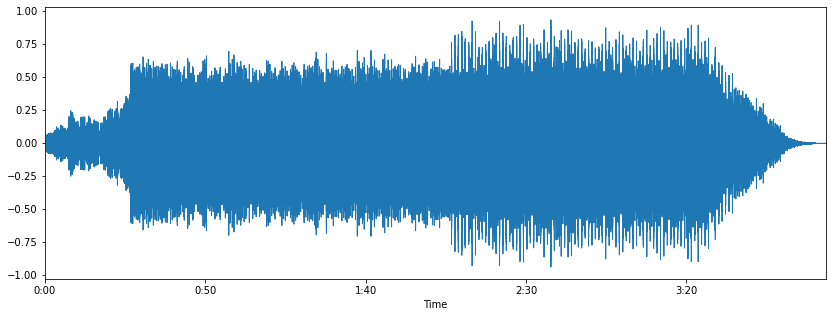

In [3]:
#Visualizing Audio
#Waveform
#We can plot the audio array using librosa.display.waveplot:
#%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

#Here, we have the plot of the amplitude envelope of a waveform:

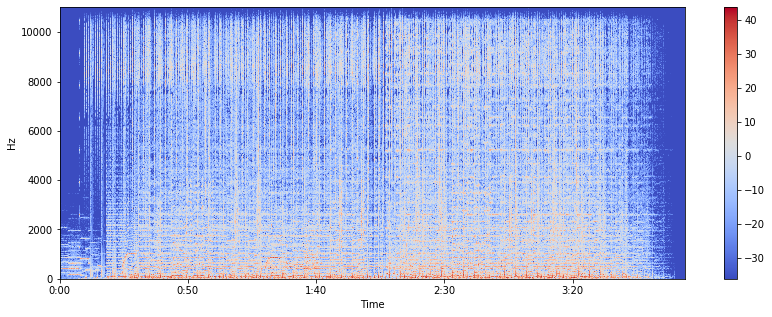

In [15]:
# Spectrogram
#A spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. Spectrograms are sometimes called sonographs, voiceprints, or voicegrams. When the data is represented in a 3D plot, they may be called waterfalls. In 2-dimensional arrays, the first axis is frequency while the second axis is time.
#We can display a spectrogram using. librosa.display.specshow.

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

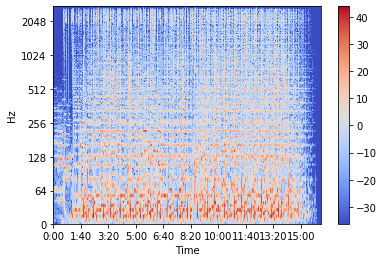

In [47]:
#The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the 
#time of the clip. Since we see that much of the heavy action is taking place at the 
#bottom of the spectrum (this is a bass-heavy song), we can convert the frequency axis to 
#a logarithmic one to better inspect these lower frequency sound patterns.

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [17]:
# Writing Audio
#librosa.output.write_wav saves a NumPy array to a WAV file.
librosa.output.write_wav('example.wav', x, sr)

AttributeError: module 'librosa' has no attribute 'output'

In [18]:
librosa.__version__

'0.8.0'

In [23]:
#https://stackoverflow.com/questions/63997969/attributeerror-module-librosa-has-no-attribute-output
#With moden librosa, you should instead use soundfile.write to write audio output.

# https://pysoundfile.readthedocs.io/en/0.8.1/#soundfile.write

# Writing Audio
import numpy as np
import soundfile as sf
#sf.write('stereo_file.wav', np.random.randn(10, 2), 44100, 'PCM_24')
#soundfile.write('example.wav', x, sr)
sf.write('example.wav',x,sr)

In [29]:
#Creating an audio signal
#Let us now create an audio signal at 220Hz. An audio signal is a numpy array, so we shall
#create one and pass it into the audio function.

import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array

#Saving the audio
#librosa.output.write_wav('tone_220.wav', x, sr)
sf.write('tone_220.wav',x,sr)

In [30]:
# playing that audio file we just created
ipd.Audio('tone_220.wav')

### Feature extraction

Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study about few of the features in detail.

<u>Zero Crossing Rate</u> <br>
The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.<br>

https://en.wikipedia.org/wiki/Zero-crossing_rate<br>
https://en.wikipedia.org/wiki/Speech_recognition<br>
https://en.wikipedia.org/wiki/Music_information_retrieval <br>

<u>Recommender systems</u><br>
Several recommender systems for music already exist, but surprisingly few are based upon MIR techniques, instead making use of similarity between users or laborious data compilation. Pandora, for example, uses experts to tag the music with particular qualities such as "female singer" or "strong bassline". Many other systems find users whose listening history is similar and suggests unheard music to the users from their respective collections. MIR techniques for similarity in music are now beginning to form part of such systems.

Let us calculate the zero crossing rate for our example audio clip. <br>

/Users/holdenbruce/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


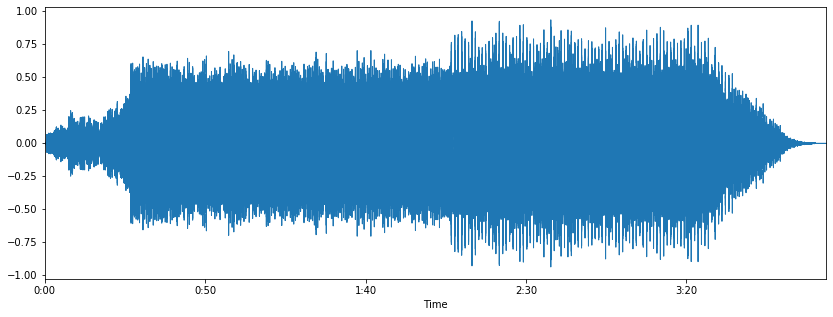

In [32]:
# Load the signal
x, sr = librosa.load('grey.mp3')

#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

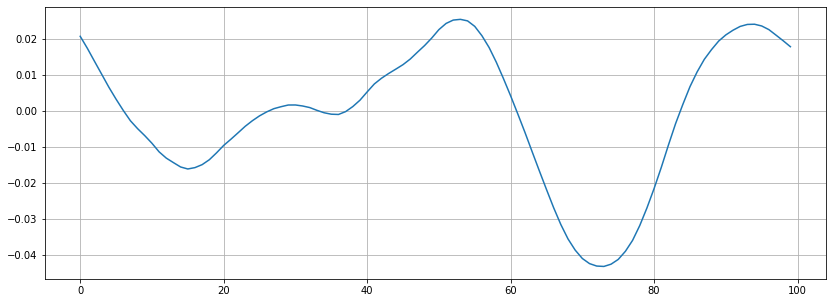

In [34]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [36]:
#There appear to be 6 zero crossings. Let’s verify with librosa.

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings)) 

#confirmed: 6

6


In [37]:
# Spectral centroid
# https://en.wikipedia.org/wiki/Spectral_centroid
# The spectral centroid is a measure used in digital signal processing to characterise a 
# spectrum. It indicates where the center of mass of the spectrum is located. Perceptually, 
# it has a robust connection with the impression of brightness of a sound.

# It is calculated as the weighted mean of the frequencies present in the signal, 
# determined using a Fourier transform, with their magnitudes as the weights.

#It indicates where the ”centre of mass” for a sound is located and is calculated as the 
#weighted mean of the frequencies present in the sound. Consider two songs, one from a 
#blues genre and the other belonging to metal. Now as compared to the blues genre song 
#which is the same throughout its length, the metal song has more frequencies towards 
#the end. So spectral centroid for blues song will lie somewhere near the middle of its 
#spectrum while that for a metal song would be towards its end.

#librosa.feature.spectral_centroid computes the spectral centroid for each frame in a 
#signal:

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
#(10491,)

(10491,)

ValueError: x and y must have same first dimension, but have shapes (2622,) and (10491,)

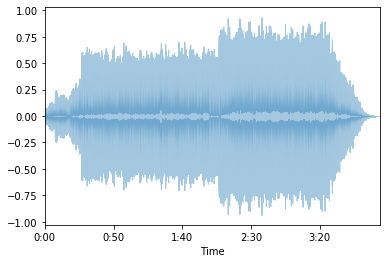

In [42]:
# Computing the time variable for visualization
frames = range(len(spectral_centroids)//4)
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')